# BART PROJECT

<img src="https://preview.redd.it/e13guqvbrl3c1.jpg?width=3600&format=pjpg&auto=webp&s=95000fa1edb9c65063980e77eb0edda326478437">

<a href="https://www.kaggle.com/datasets/mrgeislinger/bart-ridership" target="_blank">Data burada</a>

# BART PROJECT

## 1. Veri Hazırlığı
- **2016 ve 2017 Yılı Yolcu Verileri**: İki yılın yolcu verilerini birleştirerek tek bir df oluşturduk.
- **İstasyon Verileri**: İstasyon verileri dosyası ile birleştirdik.

## 2. Aşağıdaki soruları cevapladık:

### A. Hangi BART İstasyonu En Yoğun?
- En fazla yolcu taşıyan istasyonu belirlemek için yolcu verilerini analiz edip. Her istasyonun toplam yolcu sayısını hesapladık.

### B. En Az Popüler BART Rotası Nedir?
- Tüm rotaları inceleyip ve en az yolcu taşıyan rotayı belirledik.

### C. Berkeley'den SF'ye Koltuk Bulmak İçin En İyi Zaman Nedir?
- İki istasyonu filtreleyip kaç yolcu olduğunu bulduk.

### D. Haftanın Hangi Günü En Yoğun?
- Haftanın günlerine göre yolcu sayısını görselleştirdik.

### E. Gece Geç Saatlerde BART'ı Kaç Kişi Kullanıyor?
- Gece saatlerinde 22:00 - 06:00 arasını filtreledik yolcu sayısını hesapladık.

### F. POWL ve DBRK İstasyonları Arasındaki Mesafesini Hesaplayın.
- İstasyonların koordinatlarını kullanarak aralarındaki mesafeyi hesaplamak için bir yöntem geliştirdik **spatial** paketiyle.

## 3. Sonuç
Bu adımları takip ederek BART yolcu taşımacılığı hakkında derinlemesine bir analiz yapıp **Regression** modeli geliştirdik, 4 model denedik ve %80 üstü başarılı olduk.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [46]:
df1=pd.read_csv('date-hour-soo-dest-2016.csv')

In [47]:
df2=pd.read_csv('date-hour-soo-dest-2017.csv')

In [27]:
df4=pd.read_csv('station_coords.csv')

In [28]:
df5=pd.read_csv('station_names.csv')

In [48]:
df=pd.concat([df1,df2])

In [49]:
df.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2
9974094,2018-01-01,2,WOAK,WOAK,2


In [50]:
df.shape

(19947757, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19947757 entries, 0 to 9974094
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 913.1+ MB


In [52]:
df["Date"]=pd.to_datetime(df['Date'])

df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()

df.drop("Date",axis=1,inplace=True)

In [53]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year,WeekDay,Month_Name
0,0,12TH,12TH,1,4,1,2016,Friday,January
1,0,12TH,16TH,1,4,1,2016,Friday,January
2,0,12TH,24TH,4,4,1,2016,Friday,January
3,0,12TH,ASHB,4,4,1,2016,Friday,January
4,0,12TH,BALB,2,4,1,2016,Friday,January


In [54]:
df = df.drop(columns=['WeekDay', 'Month_Name'])

In [55]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year
0,0,12TH,12TH,1,4,1,2016
1,0,12TH,16TH,1,4,1,2016
2,0,12TH,24TH,4,4,1,2016
3,0,12TH,ASHB,4,4,1,2016
4,0,12TH,BALB,2,4,1,2016


In [56]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year
0,0,12TH,12TH,1,4,1,2016
1,0,12TH,16TH,1,4,1,2016
2,0,12TH,24TH,4,4,1,2016
3,0,12TH,ASHB,4,4,1,2016
4,0,12TH,BALB,2,4,1,2016


In [57]:
df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
Day                    0
Month                  0
Year                   0
dtype: int64

In [58]:
df3=pd.read_csv('station_names.csv')
#istasyon isimleri dosyası

In [59]:
df3.head(46)

,Unnamed: 0,station_name_sort,Station Name
0,0,RM,Richmond
1,1,EN,El Cerrito Del Norte
2,2,EP,El Cerrito Plaza
3,3,NB,North Berkeley
4,4,BK,Berkeley
5,5,AS,Ashby
6,6,MA,MacArthur
7,7,19,19th Street Oakland
8,8,12,12th Street / Oakland City Center
9,9,LM,Lake Merritt


## <span style="color: purple;">DATA VISUALIZATION</span>

1. Which BART station is the busiest?

 **Powel Street**  ,  **Embarcadero** ,  **Montgomery Street**    , **Civic Center**

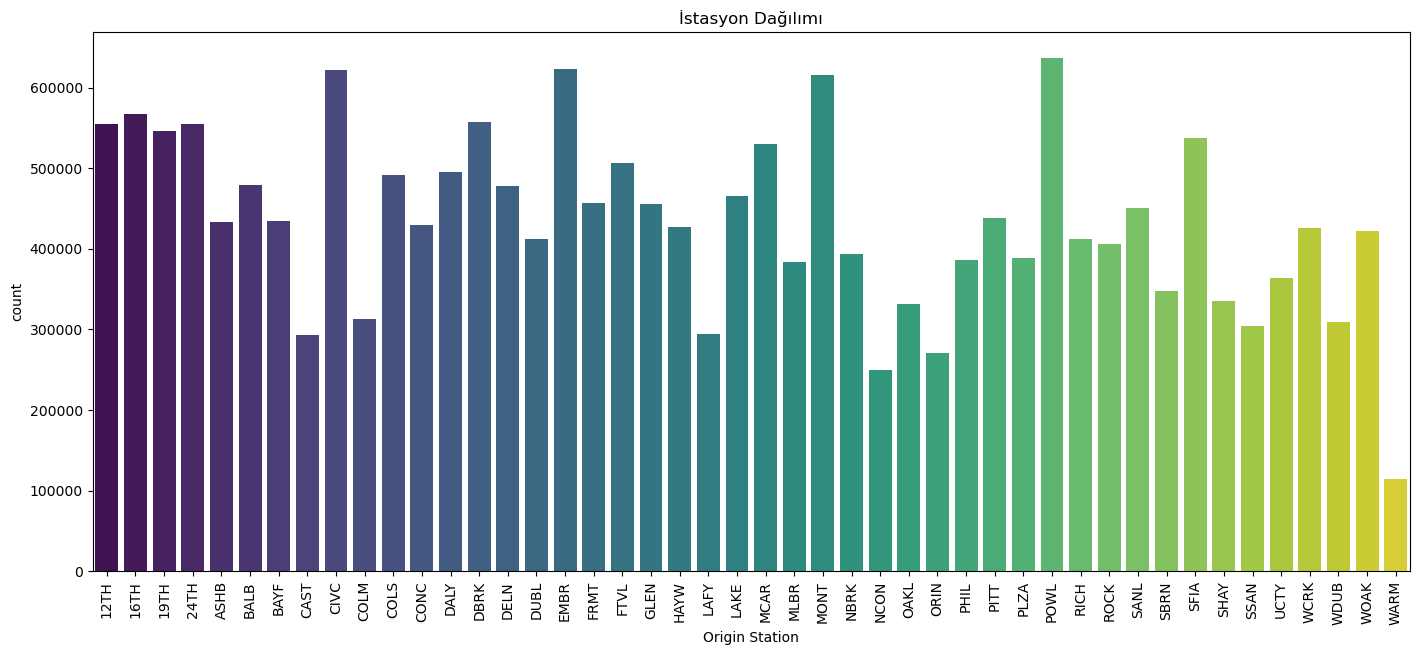

In [62]:
plt.figure(figsize=(17, 7))
sns.countplot(x=df['Origin Station'], palette='viridis')  
plt.xticks(rotation=90)
plt.title('İstasyon Dağılımı')
plt.show()

2. What is the **least popular** BART route?         **"Oakland International Airport"**

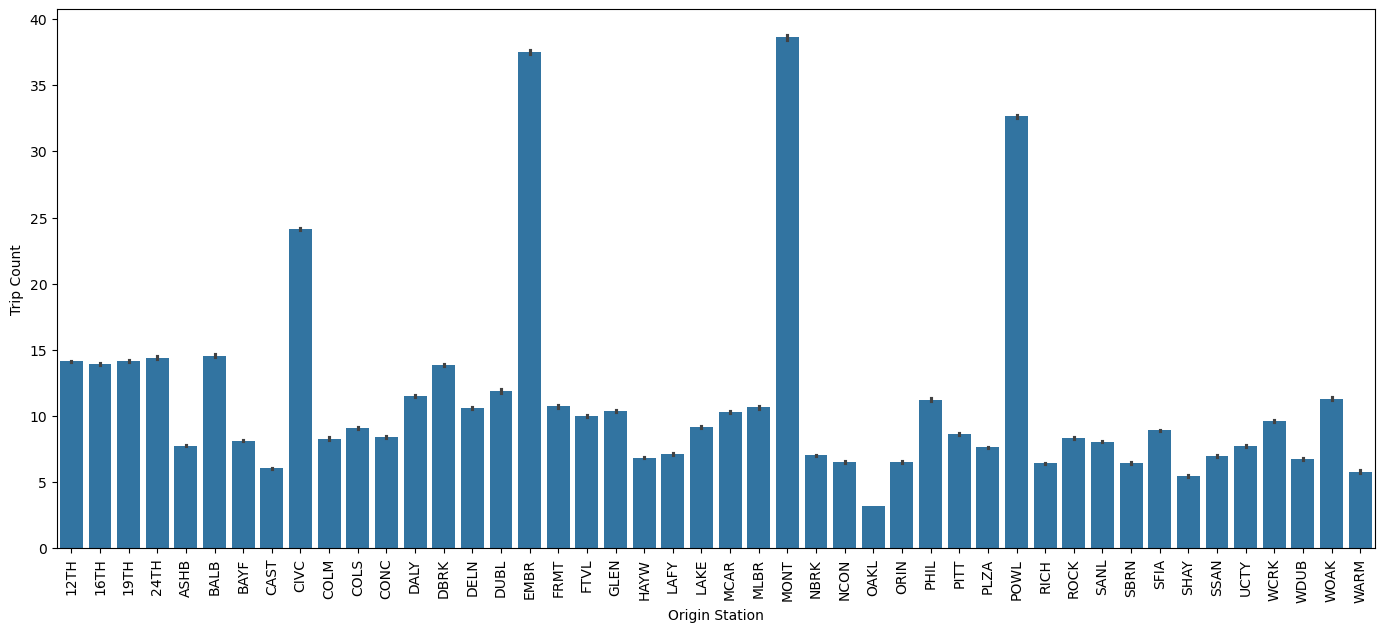

In [63]:
plt.figure(figsize=(17,7))
plt.xticks(rotation=90);
sns.barplot(x=df['Origin Station'],y=df['Trip Count']);

3. Which hour is **busiest**?  5-6 pm

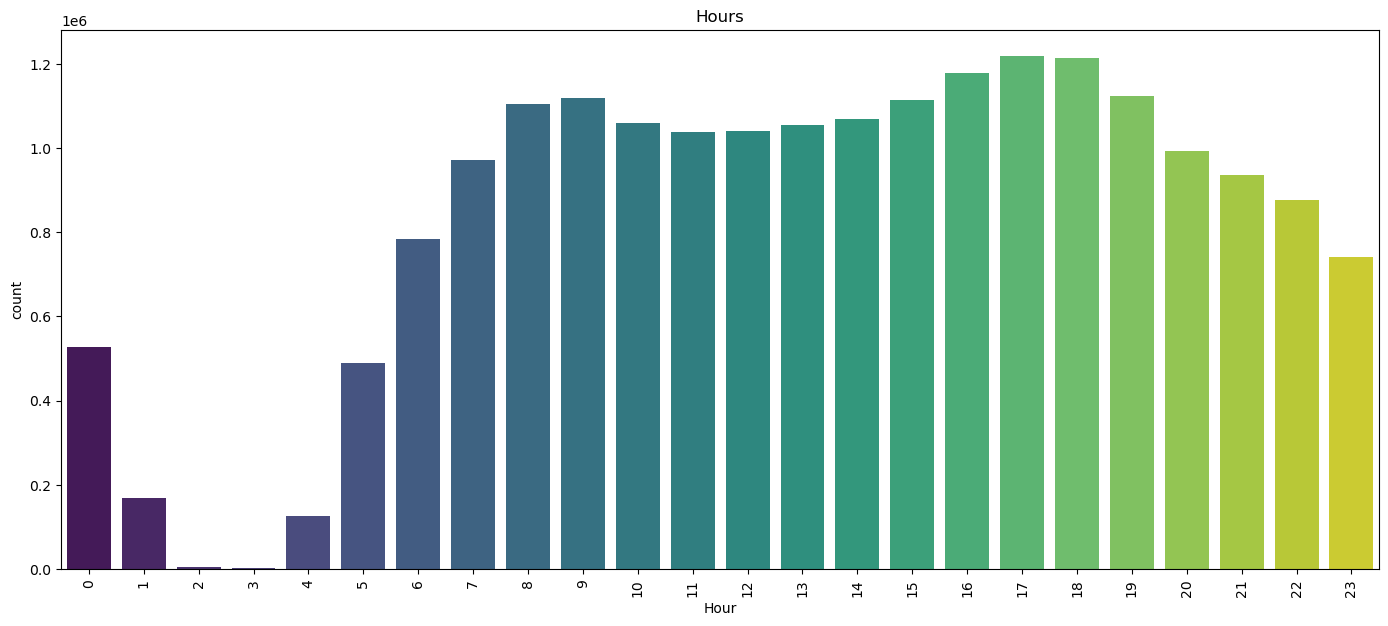

In [65]:
plt.figure(figsize=(17, 7))
sns.countplot(x=df['Hour'], palette='viridis') 
plt.xticks(rotation=90)
plt.title('Hours')
plt.show()

4. Busiest hour **accordingto "Trip count"**  

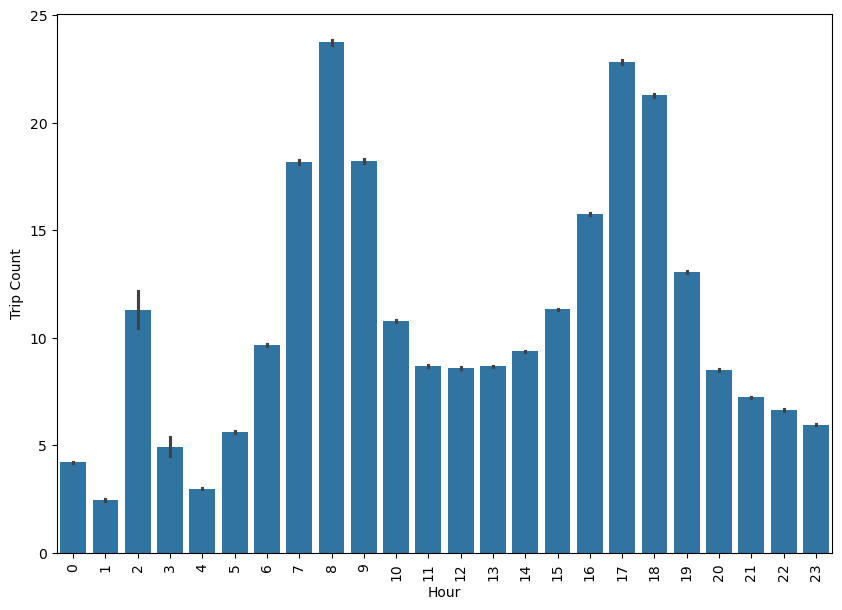

In [111]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90);
sns.barplot(x=df['Hour'],y=df['Trip Count']);
#trip counta göre en yoğun saat sabah 9

 **busiest day**

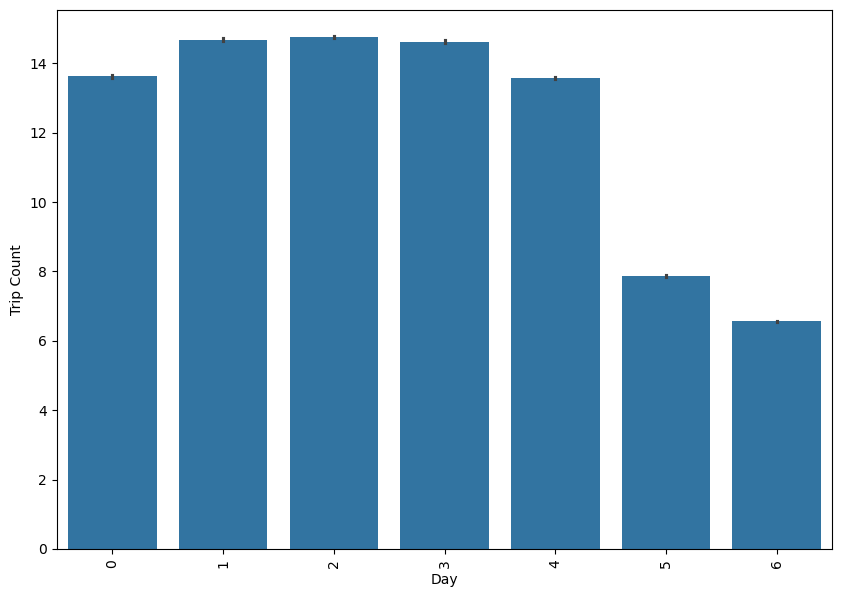

In [109]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90);
sns.barplot(x=df['Day'],y=df['Trip Count']);
#haftanın en yoğun günü çarşamba günü, en sakin pazar

3. When is the best time to go from **Berkeley** to **San Francisco** if you want to find a seat?
* Bunun için önce POWL'dan DBRKK istasyonuna giden seferleri filtreleyelim.
* Her saat bu rotada kaç yolcu olduğunu bulalım.
* Koltukta gitmenin mümkün olduğu saati belirlersek sadece gece çıkıyor, her saat için yolcu sayısına bakalım daha iyi, bu sunuca göre 1,2,3, gibi uygun saatler.
 * Grafikle de görelim

In [83]:
berkeley_stations = ['DBRK']  # dbrk den powl a giden seferleri seçelim
sf_stations = ['POWL']

In [84]:
filtered_df = df[(df['Origin Station'].isin(berkeley_stations)) &   # filtreleyelim
                 (df['Destination Station'].isin(sf_stations))]

In [85]:
hourly_counts = filtered_df.groupby('Hour')['Trip Count'].sum().reset_index() # her saat için toplam yolcu sayısını hesaplayalım

In [86]:
least_crowded_hour = hourly_counts[hourly_counts['Trip Count'] == hourly_counts['Trip Count'].min()]  # en az yolcu olan saatleri bulalım

In [87]:
hourly_counts = filtered_df.groupby('Hour')['Trip Count'].sum().reset_index() # her saat için yolcu sayısı

In [88]:
print("best times to go to SF from Berkeley if you want to find a seat:")
print(hourly_counts)

best times to go to SF from Berkeley if you want to find a seat:
    Hour  Trip Count
0      0        5203
1      1         979
2      2          18
3      3           3
4      4         123
5      5        1517
6      6        5408
7      7       12787
8      8       33466
9      9       43183
10    10       35884
11    11       35577
12    12       37055
13    13       38980
14    14       38929
15    15       38333
16    16       38912
17    17       49303
18    18       44504
19    19       30417
20    20       17556
21    21       15263
22    22       13982
23    23       11608


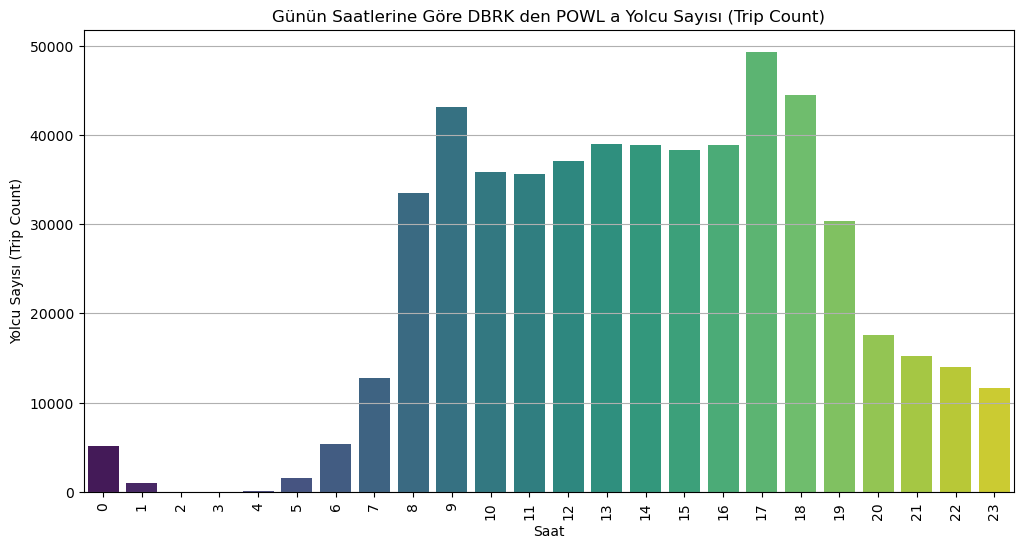

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Trip Count', data=df_hourly, palette='viridis')
plt.title('Günün Saatlerine Göre DBRK den POWL a Yolcu Sayısı (Trip Count)')
plt.xlabel('Saat')
plt.ylabel('Yolcu Sayısı (Trip Count)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

 ## <span style="color: purple;">BART'ı gece saat 22:00 - 06:00 arası kaç kişi kullanıyor?</span>

In [97]:
filtered_df = df[(df['Hour'] >= 22) | (df['Hour'] < 6)]  # akşam 10 dan sonraki veya 6 dan önceki diye seçtik
toplam_trip_count = filtered_df['Trip Count'].sum()  # tüm o değerleri topla
print(toplam_trip_count)

16055441


* **16055441** yolcu olduğunu söylüyor bu aralıkta, bu ciddi bir rakam, demek gece de yoğun bir yolcu trafiği var.

## <span style="color: pink;">DBRK ve POWL istasyonları arasındaki mesafe</span>

* Bunun için önceden yüklediğim df4 coordinate csv dosyamı okudum, gerekli kütüphane olan iki kınum arasındaki mesafeyi ölçen **spatial** import ettim ve iki istasyon arasındaki **euclidian** mesafeyi hesapladım. **505.07** birim çıktı.

In [99]:
df4.drop(["Unnamed: 0"],axis=1,inplace=True)

In [100]:
df4.head()

,station_name,latitute,longitude
0,12TH,798,702
1,19TH,798,655
2,MCAR,802,607
3,16TH,375,948
4,CIVC,397,915


In [103]:
import pandas as pd
from scipy.spatial import distance  # iki konum arsındaki mesafeyi ölçme paketi

In [104]:
dbk_coords = df4.loc[df4['station_name'] == 'DBRK', ['latitute', 'longitude']].values[0] # DBRK ve POWL koordinatlarını alma
pwl_coords = df4.loc[df4['station_name'] == 'POWL', ['latitute', 'longitude']].values[0]

def compute_distance(a, b):   # Mesafeyi hesapla ve koordinatları birleştir 
    coords_a = [a[0], a[1]]  # Enlem ve boylam
    coords_b = [b[0], b[1]]  # Enlem ve boylam
    return distance.euclidean(coords_a, coords_b) 
distance_value = compute_distance(dbk_coords, pwl_coords)  # Mesafeyi hesapla
print(f"DBRK ve POWL arasındaki mesafe: {distance_value:.2f} birim")

DBRK ve POWL arasındaki mesafe: 505.07 birim


## <span style="color: purple;">Herhangi 2 istasyon arasında gidip gelen insan sayısını tahmin etmek için regression modeli</span>

* Önce bu 2 sutunu rakama çevirdim

In [143]:
station_mapping = {
    'POWL': '1', 'EMBR': '2', 'CIVC': '3', 'MONT': '4',
    '16TH': '5', 'DBRK': '6', '12TH': '7', '24TH': '8',
    '19TH': '9', 'SFIA': '10', 'MCAR': '11', 'FTVL': '12',
    'DALY': '13', 'COLS': '14', 'BALB': '15', 'DELN': '16',
    'LAKE': '17', 'FRMT': '18', 'GLEN': '19', 'SANL': '20',
    'PITT': '21', 'BAYF': '22', 'ASHB': '23', 'CONC': '24',
    'HAYW': '25', 'WCRK': '26', 'WOAK': '27', 'RICH': '28',
    'DUBL': '29', 'ROCK': '30', 'NBRK': '31', 'PLZA': '32',
    'PHIL': '33', 'MLBR': '34', 'UCTY': '35', 'SBRN': '36',
    'SHAY': '37', 'OAKL': '38', 'COLM': '39', 'WDUB': '40',
    'SSAN': '41', 'LAFY': '42', 'CAST': '43', 'ORIN': '44',
    'NCON': '45', 'WARM': '46'
}
df['Origin Station'] = df['Origin Station'].replace(station_mapping)

In [144]:
destination_mapping = {
    'POWL': '1', 'EMBR': '2', 'CIVC': '3', 'MONT': '4',
    '16TH': '5', 'DBRK': '6', '12TH': '7', '24TH': '8',
    '19TH': '9', 'SFIA': '10', 'MCAR': '11', 'FTVL': '12',
    'DALY': '13', 'COLS': '14', 'BALB': '15', 'DELN': '16',
    'LAKE': '17', 'FRMT': '18', 'GLEN': '19', 'SANL': '20',
    'PITT': '21', 'BAYF': '22', 'ASHB': '23', 'CONC': '24',
    'HAYW': '25', 'WCRK': '26', 'WOAK': '27', 'RICH': '28',
    'DUBL': '29', 'ROCK': '30', 'NBRK': '31', 'PLZA': '32',
    'PHIL': '33', 'MLBR': '34', 'UCTY': '35', 'SBRN': '36',
    'SHAY': '37', 'OAKL': '38', 'COLM': '39', 'WDUB': '40',
    'SSAN': '41', 'LAFY': '42', 'CAST': '43', 'ORIN': '44',
    'NCON': '45', 'WARM': '46'
}

df['Destination Station'] = df['Destination Station'].replace(destination_mapping)

In [145]:
df['Origin Station'] = df['Origin Station'].astype(int)
df['Destination Station'] = df['Destination Station'].astype(int)

* **x** ve **y** belirledim.

In [146]:
x=df[['Origin Station','Destination Station','Hour','Day',
       'Month', 'Year']]
y=df[['Trip Count']]

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### model 1

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dt=DecisionTreeRegressor()

In [150]:
model1=dt.fit(x_train, y_train)

In [151]:
tahmin1=model1.predict(x_test)

In [152]:
r2_score(tahmin1,y_test)

0.8755535536713739

In [74]:
mean_squared_error(tahmin1,y_test)**.5

11.420485675427452

### Model 2

In [162]:
et=ExtraTreeRegressor()

In [163]:
model2=et.fit(x_train, y_train)

In [164]:
tahmin2=model2.predict(x_test)

In [165]:
r2_score(tahmin2,y_test)

0.8754334715291321

In [166]:
mean_squared_error(tahmin2,y_test)**.5

11.427533769015156

### Model 3 

In [167]:
xgb=XGBRegressor()

In [168]:
model3=et.fit(x_train, y_train)

In [169]:
tahmin3=model3.predict(x_test)

In [170]:
r2_score(tahmin3,y_test)

0.8753960890444845

In [171]:
mean_squared_error(tahmin3,y_test)**.5

11.42871139690629

### Model 4

In [172]:
rl=Ridge,Lasso()

In [173]:
model4=et.fit(x_train, y_train)

In [174]:
tahmin4=model4.predict(x_test)

In [175]:
r2_score(tahmin4,y_test)

0.8755558540046534

In [176]:
mean_squared_error(tahmin4,y_test)**.5

11.420934116660606

In [177]:
df.to_pickle('bart_project.pkl')

* Modellerim başarılı oldu, 4 model denedim hepi %80 i geçti.